In [ ]:
#predict the price of Tesla stock for a 
#day using dataset from 2010 to 2020 using Machine Learning Algorithms

In [ ]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import files
files.upload()

In [ ]:
#Store the data
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [ ]:
df = df.drop(df.index[:2385])
df

In [ ]:
#Show and store last row of data
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
2415,2020-02-03,673.690002,786.140015,673.52002,780.0,780.0,47065000


In [ ]:
#Get all the data except the last data
df = df.head(len(df)-1)
df

In [ ]:
#Create empty lists
days = list()
adj_close_prices = list()

In [ ]:
#Dates and adj close prices
df_days = df.loc[:,'Date']
df_adj_close = df.loc[:,'Adj Close']

In [ ]:
#create independent dataset(dates)
for day in df_days:
  days.append([int(day.split('-')[2])])
#create dependent dataset(adj close prices)
for adj_close_price in df_adj_close:
  adj_close_prices.append(float(adj_close_price))

In [ ]:
days

[[18],
 [19],
 [20],
 [23],
 [24],
 [26],
 [27],
 [30],
 [31],
 [2],
 [3],
 [6],
 [7],
 [8],
 [9],
 [10],
 [13],
 [14],
 [15],
 [16],
 [17],
 [21],
 [22],
 [23],
 [24],
 [27],
 [28],
 [29],
 [30],
 [31]]

In [ ]:
adj_close_prices

[393.149994,
 404.040009,
 405.589996,
 419.220001,
 425.25,
 430.940002,
 430.380005,
 414.700012,
 418.329987,
 430.26001,
 443.01001,
 451.540009,
 469.059998,
 492.140015,
 481.339996,
 478.149994,
 524.859985,
 537.919983,
 518.5,
 513.48999,
 510.5,
 547.200012,
 569.559998,
 572.200012,
 564.820007,
 558.02002,
 566.900024,
 580.98999,
 640.809998,
 650.570007]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(days, adj_close_prices, test_size=0.2, random_state=42)


In [ ]:
#create models
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(X_train, y_train)

poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(X_train, y_train)

rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.1)
rbf_svr.fit(X_train, y_train)

# Evaluate the performance of your models on the testing data
lin_svr_score = lin_svr.score(X_test, y_test)
poly_svr_score = poly_svr.score(X_test, y_test)
rbf_svr_score = rbf_svr.score(X_test, y_test)

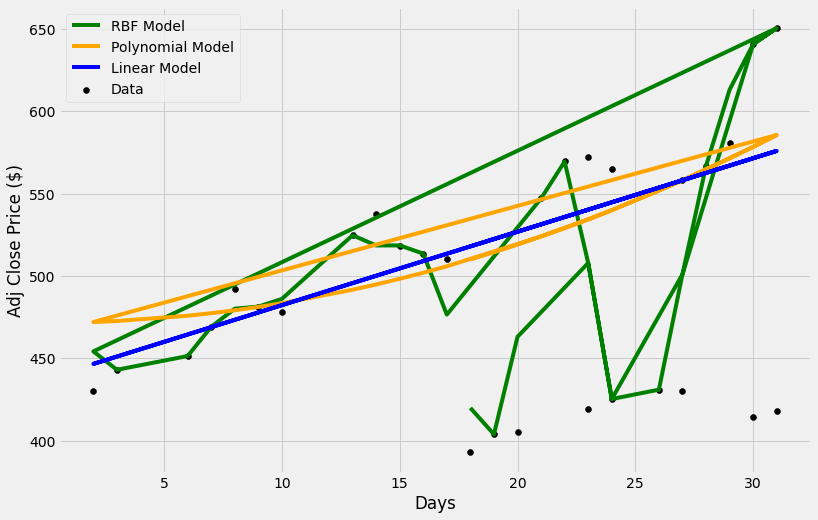

In [ ]:
#Plot the models
plt.figure(figsize=(12,8))
plt.scatter(days,adj_close_prices,color='black',label='Data')
plt.plot(days,rbf_svr.predict(days),color='green',label = 'RBF Model')
plt.plot(days,poly_svr.predict(days),color='orange',label = 'Polynomial Model')
plt.plot(days,lin_svr.predict(days),color='blue',label = 'Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price ($)')
plt.legend()
plt.show()

In [ ]:
#show the prediction for a day
day = [[31]]
print('The RBF SVR predicted price:',rbf_svr.predict(day))
print('The Linear SVR predicted price:',lin_svr.predict(day))
print('The Polynomial SVR predicted price:',poly_svr.predict(day))

The RBF SVR predicted price: [650.47016925]
The Linear SVR predicted price: [575.9520244]
The Polynomial SVR predicted price: [585.62039405]


In [ ]:
day = [[31]]
print('The RBF SVR predicted price:',rbf_svr.predict(day))

The RBF SVR predicted price: [650.47016925]
